In [5]:
library(visdat)
suppressWarnings(library(tidyverse))

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [93]:
covid_data = read_csv('covid_19_data_portal.csv')

Rows: 125617 Columns: 9

-- Column specification --------------------------------------------------------
Delimiter: ","
chr (8): class, category, indicator_name, series_name, sub_series_name, para...
dbl (1): value


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [94]:
covid_data %>% names()

[1] "class"             "category"          "indicator_name"   
[4] "series_name"       "sub_series_name"   "parameter"        
[7] "value"             "units"             "date_last_updated"

In [95]:
covid_data %>% 
    filter(grepl('Wage', category, fixed = TRUE), grepl('August', category, fixed = TRUE)) %>% 
    group_by(indicator_name, sub_series_name) %>% 
    summarise(sum(value))

covid_data %>% 
    filter(grepl('Wage', category, fixed = TRUE), grepl('August', category, fixed = TRUE))

`summarise()` has grouped output by 'indicator_name'. You can override using the `.groups` argument.



indicator_name,sub_series_name,sum(value)
<chr>,<chr>,<dbl>
Amount paid out,Amount paid out in Round 1,4555524300
Amount paid out,Amount paid out in Round 2,1578125600
Amount paid out,Amount paid out in Round 3,106869800
Amount paid out,Total amount paid out,6240519900
Number of applications,Approved,2969142
Number of applications,Declined,322476
Number of applications,Received,3927552
Number of businesses associated,Number of businesses in Round 1,692247
Number of businesses associated,Number of businesses in Round 2,318954


class,category,indicator_name,series_name,sub_series_name,parameter,value,units,date_last_updated
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
Income support,Wage subsidy (August 2021),Number of businesses associated,undefined_name,Total number of businesses,2021-08-20,34437,Number,24-09-21
Income support,Wage subsidy (August 2021),Number of businesses associated,undefined_name,Total number of businesses,2021-08-27,186777,Number,24-09-21
Income support,Wage subsidy (August 2021),Number of businesses associated,undefined_name,Total number of businesses,2021-09-03,242814,Number,24-09-21
Income support,Wage subsidy (August 2021),Number of businesses associated,undefined_name,Total number of businesses,2021-09-10,274245,Number,24-09-21
Income support,Wage subsidy (August 2021),Number of businesses associated,undefined_name,Total number of businesses,2021-09-17,298911,Number,24-09-21
Income support,Wage subsidy (August 2021),Number of businesses associated,undefined_name,Number of businesses in Round 1,2021-08-20,34437,Number,24-09-21
Income support,Wage subsidy (August 2021),Number of businesses associated,undefined_name,Number of businesses in Round 1,2021-08-27,186777,Number,24-09-21
Income support,Wage subsidy (August 2021),Number of businesses associated,undefined_name,Number of businesses in Round 1,2021-09-03,207741,Number,24-09-21
Income support,Wage subsidy (August 2021),Number of businesses associated,undefined_name,Number of businesses in Round 1,2021-09-10,143331,Number,24-09-21


In [20]:
covid_data %>% select(indicator_name) %>% distinct() %>% nrow()

[1] 162

https://www.health.govt.nz/our-work/diseases-and-conditions/covid-19-novel-coronavirus/covid-19-data-and-statistics/covid-19-vaccine-data

https://www.stats.govt.nz/experimental/covid-19-data-portal

In [104]:
`%!in%` <- Negate(`%in%`)
monthly_job_data <- covid_data %>% select(class, category, indicator_name, Region=series_name, Date=parameter, Jobseeker_benefit= value) %>% 
    filter(class == "Income support", category == 'Benefits', indicator_name == 'Jobseeker support by MSD region', Region %!in% c('Total'))
monthly_job_data

class,category,indicator_name,Region,Date,Jobseeker_benefit
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Income support,Benefits,Jobseeker support by MSD region,Auckland metro,2020-09-25,67236
Income support,Benefits,Jobseeker support by MSD region,Auckland metro,2020-10-02,67554
Income support,Benefits,Jobseeker support by MSD region,Auckland metro,2020-10-09,67758
Income support,Benefits,Jobseeker support by MSD region,Auckland metro,2020-10-16,67887
Income support,Benefits,Jobseeker support by MSD region,Auckland metro,2020-10-23,67773
Income support,Benefits,Jobseeker support by MSD region,Auckland metro,2020-10-30,67719
Income support,Benefits,Jobseeker support by MSD region,Auckland metro,2020-11-06,67857
Income support,Benefits,Jobseeker support by MSD region,Auckland metro,2020-11-13,67971
Income support,Benefits,Jobseeker support by MSD region,Auckland metro,2020-11-20,68289


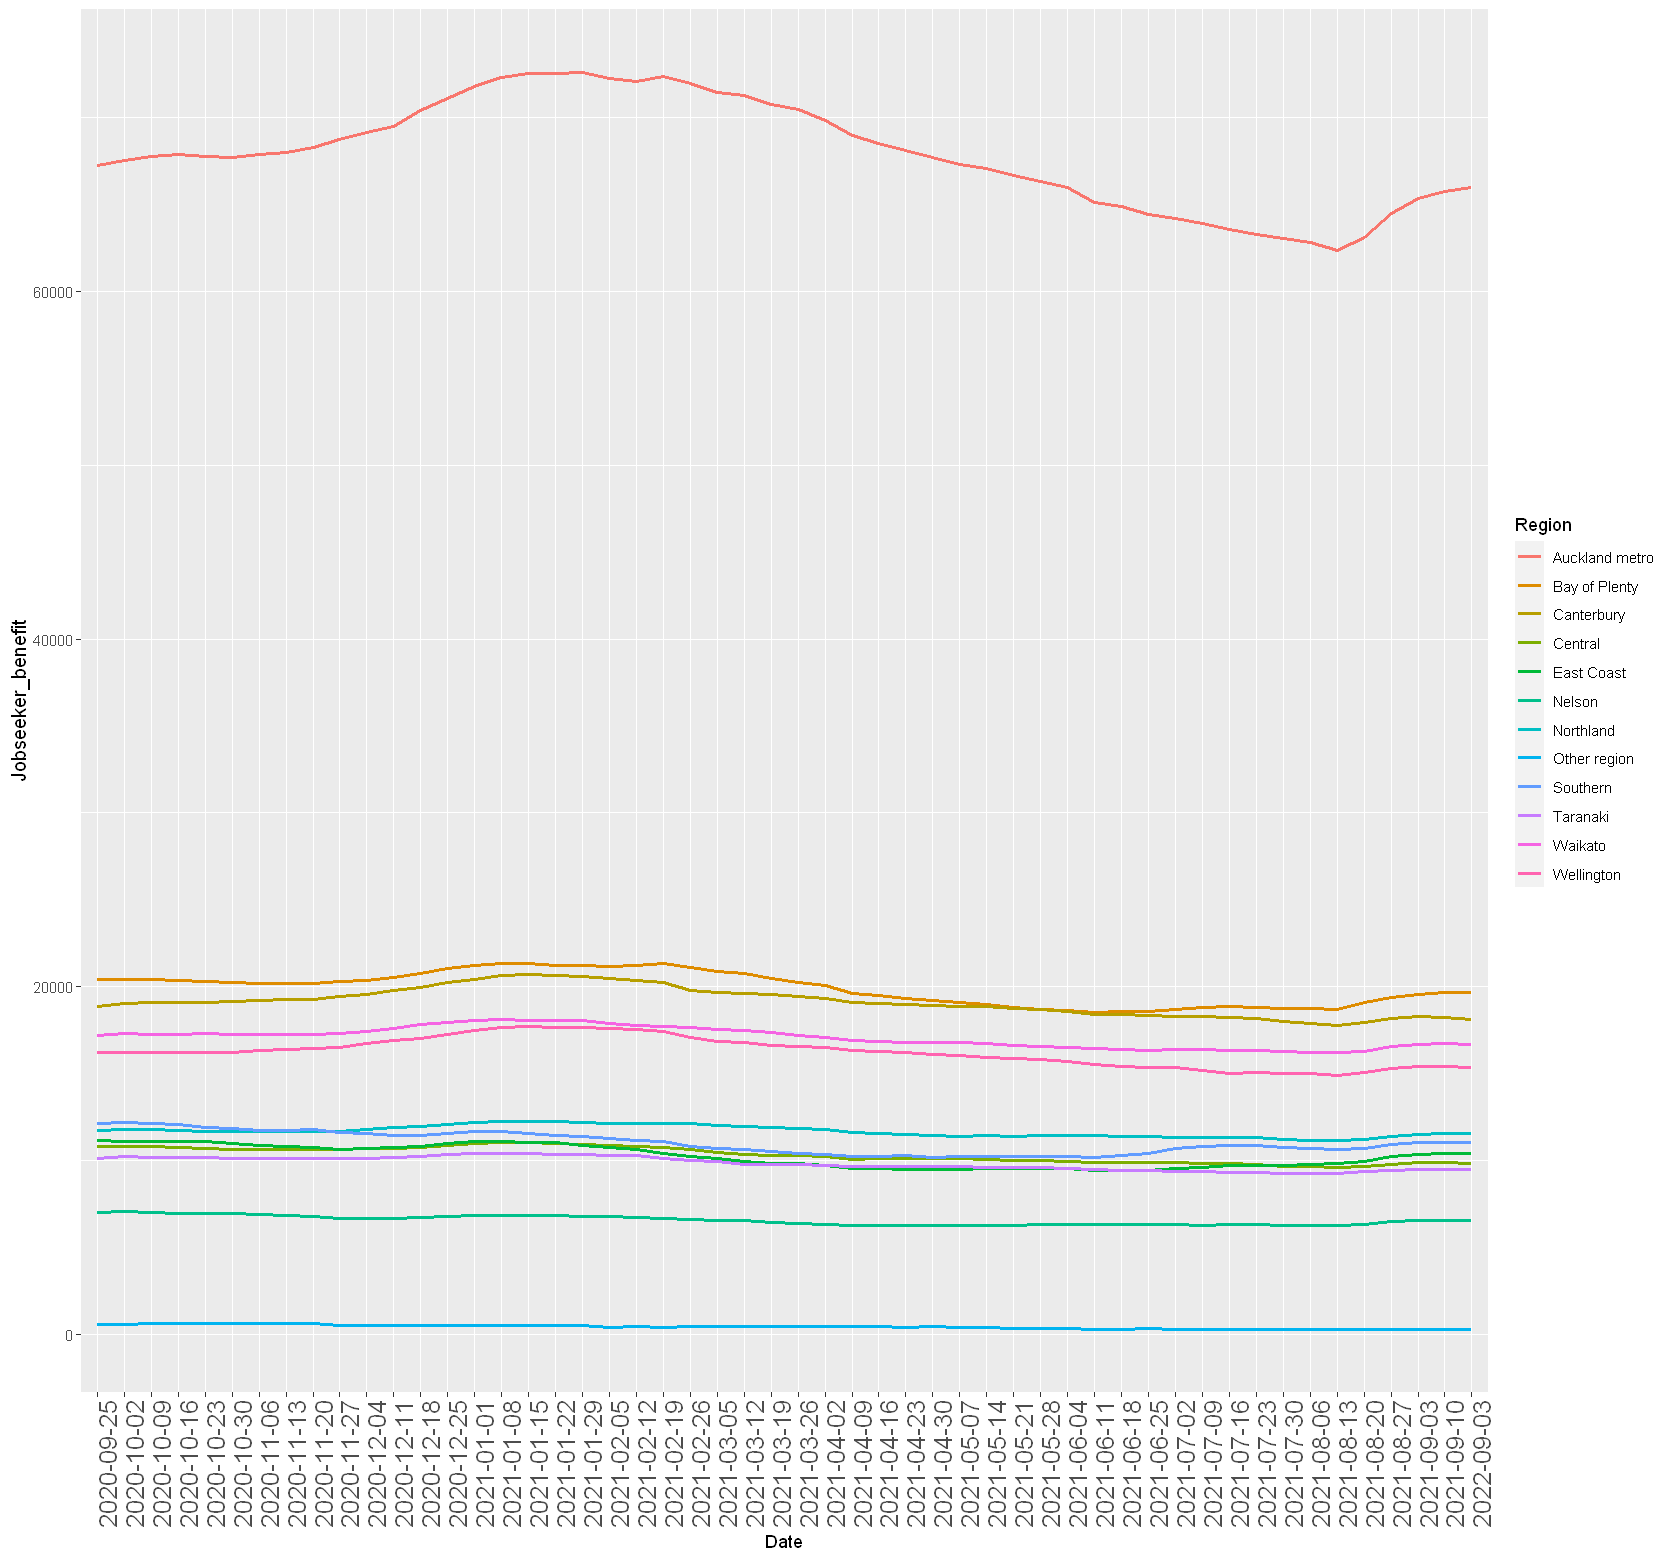

In [105]:
options(repr.plot.width=14, repr.plot.height=13)
monthly_job_data %>% 
    ggplot(aes(group = Region, x= Date, y= Jobseeker_benefit)) +
    geom_line(size=1)+
    aes(color=Region) + # adjusting visual elements of plot to make it more readable
    theme(axis.title.y = element_text(size=12),
    axis.text.x = element_text(size=15, angle=90))

In [35]:
library(readxl)

### Average trust in health system by region

Some of the code here is slightly redundant; it was useful when I wasn't just getting the average ratings, but the range of different ratings available, and so needed to create the one col from the first three, had to get rid of a bunch of NA's, re-add some so that the col lengths matched up etc, so ignore some of that and I'll tidy it up at a later point. Decided just getting the average is probably more sensible.

The function works for the two data sets march2021 and june2020 so presuming the sets inbetween aren't that dissimilar the function should work on those too. Unless the amount of initial empty rows differs, in which case it'll have to be revised. These two sets aren't identical in lengths so I had to generalize the code from what I had originally.

I liked the idea of graphically showing the change in trust over time hence the morphing of the plots at the bottom. Is this something we should try to put in a presentation or nah? Keen to hear what you guys think. 

In [435]:
# function to wrangle average health trust data by region for different xlsx files so can be plotted against each other

regions = c('Northland', "Auckland", "Waikato", "Bay of Plenty", "Gisborne/Hawke's Bay", 'Taranaki', 'Manawatu-Whanganui', 'Wellington', 
            'Nelson/Tasman/Marlborough/West Coast', 'Canterbury', 'Otago', 'Southland') #regions in file;will have to adjust to agree with Jack's data
        

health_trust <- function(wellbeing_file){
    wellbeing <- read_xlsx(wellbeing_file, sheet=5, skip=5) #read in xlsx, 5th sheet, skipping first 5 rows
    regions_df <- wellbeing %>% select(all_of(regions)) #df of regions and data only
    
    first_col <- wellbeing %>% select(1) #selecting first three cols to merge into one col of variables
    second_col <- wellbeing %>% select(2)
    third_col <- wellbeing %>% select(3)
    
    first_col <- first_col[5:nrow(first_col),]
    second_col <- second_col[5:nrow(second_col),]
    third_col <- third_col[5:nrow(third_col),] #removing NA's at top so coalesce functions correctly
    new_var_col <- coalesce(first_col[[1]],second_col[[1]],third_col[[1]])
    new_var_col <- tibble(Parameters = new_var_col)
    
    for (i in(1:4)){
        new_var_col<-rbind(data.frame(Parameters = NA),new_var_col) #re-adding NA's to retain col length integrity to region df
    }
    total_df <- regions_df %>% add_column(new_var_col, .before='Northland') #joining col to dataframe
    
    num <- which(total_df$Parameters == 'Trust held for health system') + 5 #mean value row is 5 indices below the 'trust...' row
    mean_wellbeing_row <- total_df[num,2:length(total_df)] #average ratings by each region
    
    region_wellbeing_df <- mean_wellbeing_row %>% gather('Regions', Average_rating, 1:12) #tidy data
    region_wellbeing_df <- region_wellbeing_df %>% mutate(Average_rating = as.double(Average_rating)) #changing data type so plotting works
    
    return(region_wellbeing_df)
}

In [436]:
march21_health_trust <-health_trust('wellbeing-statistics-March-2021-quarter.xlsx')

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...



In [437]:
march21_health_trust

Regions,Average_rating
<chr>,<dbl>
Northland,6.7
Auckland,7.5
Waikato,7.2
Bay of Plenty,7.0
Gisborne/Hawke's Bay,7.1
Taranaki,6.7
Manawatu-Whanganui,6.9
Wellington,7.3
Nelson/Tasman/Marlborough/West Coast,7.0


In [440]:
june20 <-health_trust('wellbeing-statistics-june-2020-quarter.xlsx')

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...



In [441]:
june20 

Regions,Average_rating
<chr>,<dbl>
Northland,7.2
Auckland,7.7
Waikato,7.4
Bay of Plenty,7.4
Gisborne/Hawke's Bay,7.2
Taranaki,6.7
Manawatu-Whanganui,7.1
Wellington,7.5
Nelson/Tasman/Marlborough/West Coast,7.1


In [442]:
# these plots are rough, just wanted to create a quick demonstration of morphing them together

march_image <- march21_health_trust %>% ggplot(aes(x=Regions, y=Average_rating)) + geom_point() + expand_limits(y = c(5, 10))
june_image <- june20 %>% ggplot(aes(x=Regions, y=Average_rating)) + geom_point() + expand_limits(y = c(5, 10))

In [443]:
library(magick)

In [444]:
ggsave("march_2021.jpg",plot = march_image, device = "jpg")

Saving 6.67 x 6.67 in image



In [445]:
ggsave("june_2020.jpg",plot = june_image, device = "jpg")

Saving 6.67 x 6.67 in image



In [451]:
# Had to comment out the image morphing as the file size became too large for github?

In [450]:
newjune <- image_read("june_2020.jpg")
newmarch <- image_read("march_2021.jpg")

#frames <- image_morph(c(newmarch, newjune), frames = 30)
#image_animate(frames)